# Predefined TFBS

This notebook shows how to analyze the TF-co-occurrences of predefined TFBS. The data used here is obtained from ENCODE.

## Setup a CombObj

In [1]:
import tfcomb.objects
C = tfcomb.objects.CombObj()

## Read TFBS from .bed-file

In [2]:
C.TFBS_from_bed("../data/GM12878_hg38_chr1_TFBS.bed")

INFO: Reading sites from '../data/GM12878_hg38_chr1_TFBS.bed'...
INFO: Read 205199 sites (comprising 118 unique TFs)


Now, the CombObj contains the .TFBS variable holding all TFBS to use:

In [3]:
C.TFBS[:10]

[chr1	804936	804937	BHLHE40	1000	.,
 chr1	805453	805454	MEF2B	1000	.,
 chr1	826821	826822	TRIM22	549	.,
 chr1	827294	827295	GATAD2B	777	.,
 chr1	827299	827300	MEF2B	820	.,
 chr1	827303	827304	POLR2AphosphoS5	911	.,
 chr1	827305	827306	PBX3	699	.,
 chr1	827391	827392	E2F8	939	.,
 chr1	827409	827410	KLF5	597	.,
 chr1	827414	827415	NKRF	1000	.]

## Count co-occurring TFs

In [4]:
C.count_within() #counts co-occurring TFs with standard parameters

INFO: Counting co-occurring TFs from .TFBS...
INFO: Done finding co-occurrences! Run .market_basket() to estimate significant pairs


## Perform market basket analysis

In [5]:
C.market_basket()

INFO: Parameter 'threads' is set to '1' - to speed up p-value calculation, please increase the number of threads used.
INFO: Progress: 10%
INFO: Progress: 20%
INFO: Progress: 30%
INFO: Progress: 40%
INFO: Progress: 50%
INFO: Progress: 60%
INFO: Progress: 70%
INFO: Progress: 80%
INFO: Progress: 90%
INFO: Finished!
INFO: Market basket analysis is done! Results are found in <CombObj>.rules


In [6]:
C.rules.head()

,TF1,TF2,TF1_TF2_count,TF1_count,TF2_count,n_baskets,TF1_TF2_support,TF1_support,TF2_support,cosine,cosine_pvalue,cosine_pvalue_adj
BATF-JUNB,BATF,JUNB,1951,3295,3060,205199,0.009508,0.016058,0.014912,0.614425,2.734407e-05,3.602855e-01
JUNB-BATF,JUNB,BATF,1951,3060,3295,205199,0.009508,0.014912,0.016058,0.614425,2.734407e-05,3.602855e-01
CTCF-ZNF143,CTCF,ZNF143,2607,4845,4166,205199,0.012705,0.023611,0.020302,0.580276,7.004289e-11,9.228851e-07
ZNF143-CTCF,ZNF143,CTCF,2607,4166,4845,205199,0.012705,0.020302,0.023611,0.580276,7.004289e-11,9.228851e-07
HCFC1-SIX5,HCFC1,SIX5,401,948,528,205199,0.001954,0.004620,0.002573,0.566791,1.334777e-06,1.758702e-02


## Visualize results

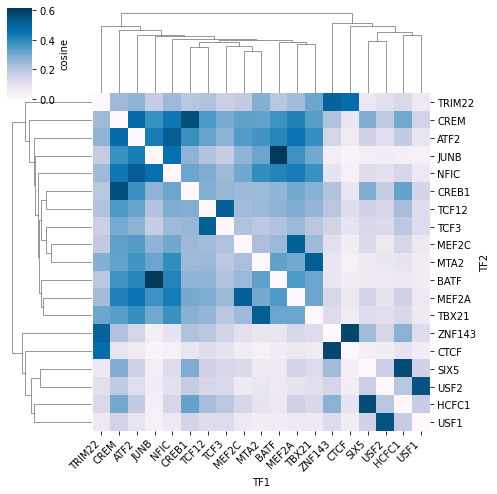

In [7]:
_ = C.plot_heatmap()

In [8]:
C.simplify_rules()

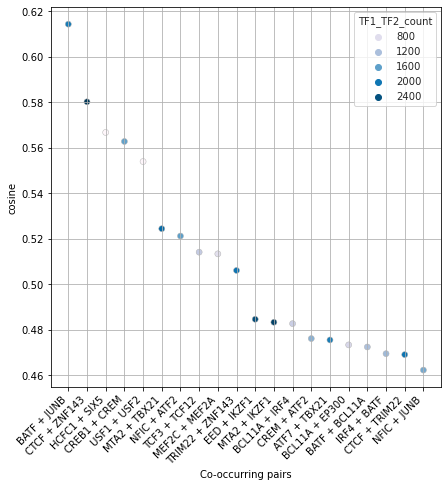

In [9]:
_ = C.plot_bubble()

## Save CombObj to a pickle object

In [10]:
C.to_pickle("../data/GM12878.pkl")